In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Visualization Styling
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print("Libraries Loaded. Ready for Real Estate Analysis.")

Libraries Loaded. Ready for Real Estate Analysis.


First 5 rows of Real Estate Data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target_Price  
0    -122.23         4.526  
1    -122.22         3.585  
2    -122.24         3.521  
3    -122.25         3.413  
4    -122.25         3.422  


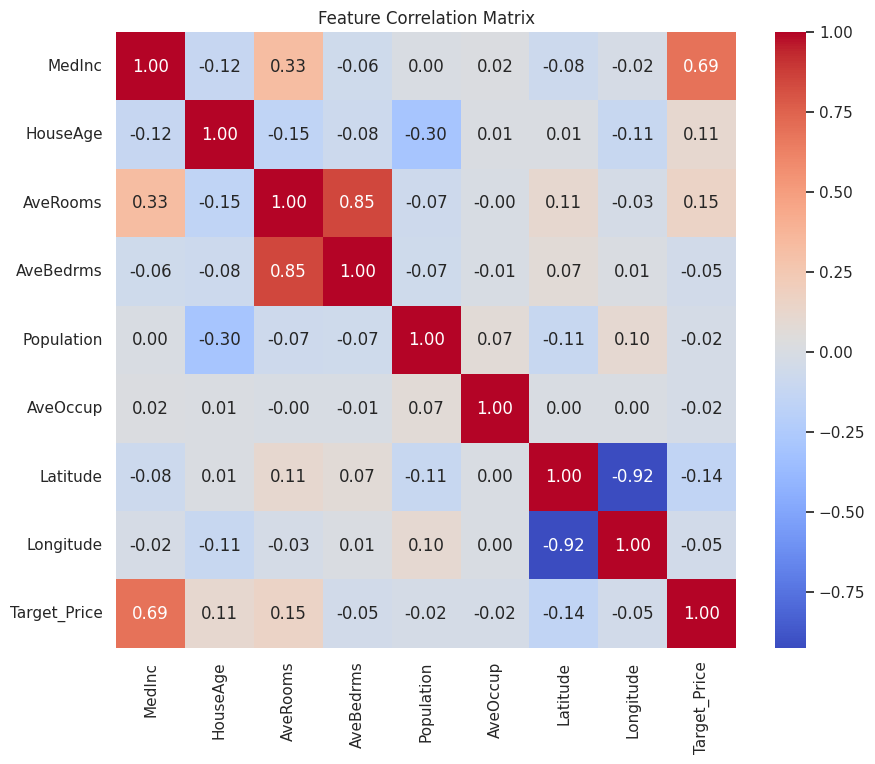

In [2]:
# Cell 2: Load Data & Visualization
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target_Price'] = housing.target  # Price is in $100,000s (e.g., 4.5 = $450k)

print("First 5 rows of Real Estate Data:")
print(df.head())

# --- VISUALIZATION: Correlation Matrix ---
# This tells us WHICH features actually matter for the price.
# 1.0 = Perfect correlation, 0.0 = No connection.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [3]:
# Cell 3: Data Splitting
# X = All features (Rooms, Age, Income, etc.)
# y = The Price (Target)
X = df.drop('Target_Price', axis=1)
y = df['Target_Price']

# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training on {X_train.shape[0]} districts.")
print(f"Testing on {X_test.shape[0]} districts.")

Training on 16512 districts.
Testing on 4128 districts.


In [4]:
# Cell 4: Model Training & Comparison
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest (Pro)": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

print("Training Models... (Random Forest might take a moment)\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # METRICS
    # R2 Score: How well the model fits (1.0 is perfect, 0.0 is terrible)
    score = r2_score(y_test, preds)
    # MAE: On average, how much $ are we off by?
    mae = mean_absolute_error(y_test, preds)

    results[name] = score
    print(f"--- {name} ---")
    print(f"R² Accuracy: {score:.2f}")
    print(f"Avg Error (MAE): ${mae*100000:.0f}\n") # Convert back to real dollars

best_model_name = max(results, key=results.get)
print(f"🏆 The Winner is: {best_model_name}")

Training Models... (Random Forest might take a moment)

--- Linear Regression ---
R² Accuracy: 0.58
Avg Error (MAE): $53320

--- Random Forest (Pro) ---
R² Accuracy: 0.81
Avg Error (MAE): $32754

🏆 The Winner is: Random Forest (Pro)


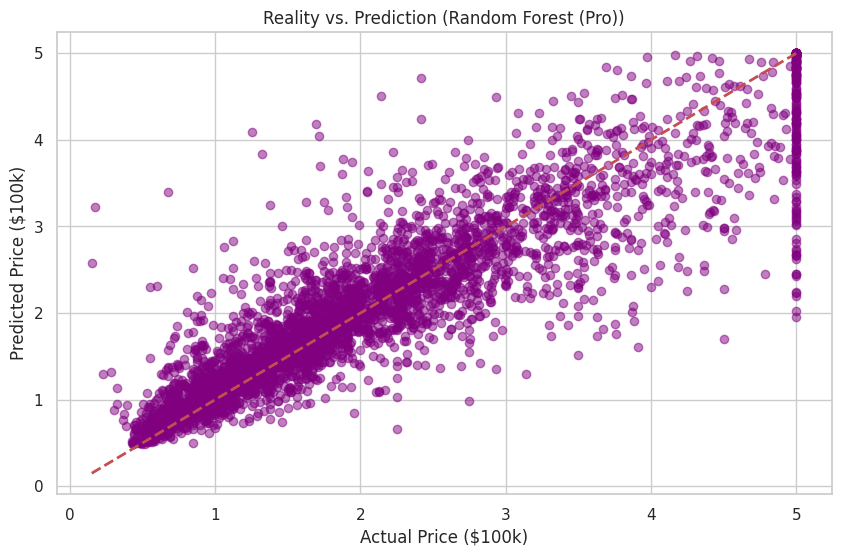

In [5]:
# Cell 5: Prediction vs Reality Plot
best_model = models[best_model_name]
final_preds = best_model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, final_preds, alpha=0.5, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # The "Perfect Prediction" line
plt.xlabel("Actual Price ($100k)")
plt.ylabel("Predicted Price ($100k)")
plt.title(f"Reality vs. Prediction ({best_model_name})")
plt.show()